Estudiante 1: 

Estudiante 2:

# IMEC2001 Herramientas Computacionales 
## Taller Semana 4: Raíces de Ecuaciones - Ecuación de Colebrook White
### Fecha Límite Entrega (Bloque Neón): <font color="#FF5733">15:29h de Noviembre 10, 2022</font>

Universidad de los Andes — Noviembre 3, 2022.
___
### <u>Tener en Cuenta</u>
- La entrega del taller es por Bloque Neon y el formato de envío es Jupyter Notebook (extensión '.ipynb').
- El nombre del archivo debe ser el nombre de los dos integrantes de grupo de la siguiente forma **T4_Apellido integrante 1_Apellidos integrante 2** Ej: T3_SalazarPeña_VargasTorres
- En la casilla anterior a esta coloque el nombre de los integrantes del grupo.
- El taller solo lo envía <b>1</b> integrante del grupo.
___


# Semana 4: Solución de Ecuaciones no Lineales

Esta semana se van a mostrar diferentes casos de soluciones de ecuaciones no lineales. En problemas de ingeniería, es importante conocer las diferentes herramientas que permiten solucionar ecuaciones que en el papel, pueden ser complejas o incluso imposibles de solucionar. 

En algunos casos las ecuaciones que se manejan no son lineales[Tienen exponentes, raices, entre otros], un ejemplo de lo anterior es un polinomio.

$$f(x)=ax^2+bx+c$$

$$x = \frac{-b+-\sqrt{b^2-4ac}}{2a}$$

Para solucionarla por lo general se utiliza la ecuación cuadrática, en esta se buscan las <b>raices</b> de la ecuación, esto es qué valores de x hacen que la ecuación sea igual a 0. Para el caso anterior, es posible calcular su valor con un lápiz y un papel, pero para ecuaciones como $ \sin^2{(x - 3)} = \cos{(2x)}$ se tendría que saber los valores de $sin$ y $cos$ para resolverla. 

Algunos de los métodos que se utilizan para solucionar este problema son:

<b>1. Método gráfico</b>

<b>2. Métodos Cerrados: </b>Se seleccionan límites en donde se sabe que se encuentra la raíz, siempre obtiene la raíz. 

    * Bisección
    * Falsa Posición
<b>3. Métodos Abiertos:</b> Pueden requerir más valores para la búsqueda, y el intervalo elegido no necesariamente contiene la raíz, por lo cual no siempre convergen.  

    * Iteración simple
    * Newton - Raphson
    * Secante

## <u>Método de bisección</u>

Este método necesita dos parámetros $x_l$ y $x_u$ siendo estos los límites inferior y superior respectivamente. Como se mencionó anteriormente se necesita saber el intervalo en donde se encuentra la solución. El algoritmo de solución el siguiente: 

1. Se seleccionan los límites [$x_l$ y $x_u$]
2. Se calcula un valor promedio entre los dos intervalos 
$$x_r = \frac{x_u + x_l}{2}$$

3. Se determina un nuevo intervalo de busqueda: Este paso depende de $x_r$, $x_u$ y $x_l$. Ya que se mira el <b>signo</b> de cada una de estas variables. Como se muestra en la siguiente figura lo que se quiere es acercarse al eje x para así encontrar la raíz.
<figure>
<img src='./img/ejemplificacion_biseccion.jpg' width="400" height="500">
<figcaption><center> <k>Ramírez R, F. (2022). 4. Raíces de ecuaciones. Modelación y Análisis Numérico ICYA 2001</k></center></figcaption>
</figure>

El error que se calcula entre las iteraciones está dado por:

$$\varepsilon_a = \frac{x_{i+1}-x_i}{x_{i+1}}$$

Dependiendo del resultado de la multiplicación entre $f(x_u)$ y $f(x_r)$ y $f(x_l)$ y $f(x_r)$ se seleccionan nuevos límites y se vuelve a repetir el proceso, esto con el fin de acercarse al punto de la raíz. 

<div class="alert alert-block alert-warning">    
Responda las siguientes preguntas:
    
1. ¿Qué pasa si se multiplica $f(x_u)$ y $f(x_r)$ para la imágen de la izquierda?
2. ¿Qué pasa si se multiplica $f(x_l)$ y $f(x_r)$ para la imágen de la derecha?
</div>

Respuestas:
1. Su producto es negativo por lo cual se identifica que cambia el intervalo de búsqueda
2. Su producto es negativo por lo cual se identifica que cambia el intervalo de búsqueda

In [1]:
# Implementación método de bisección 

import math

x_l = 0               # Límite inferior
x_u = 1               # Límite superior 
n = 100               # Número de iteraciones
tol = 10**-8          # Tolerancia 

def f(x: float) -> float:
    """
    Evaluación de x en la función

    Parameters
    ----------
    x : float
        Valor que se evalúa.

    Returns
    -------
    float
        Resultado de la operación

    """
    return math.sin(x-3)**2 - math.cos(2*x)

# Bono: ¿Qué hace el término de tolerancia y cómo se relaciona con el error?  
# RTA: Es el valor mínimo que uno está dispuesto a aceptar

def biseccion(x_l: float, x_u: float, n: float= 100, tol : float= 10**-8) -> float:
    """
    Función que implementa el método de bisección 
    
    Parameters
    ----------
    x_l : float
        Límite inferior.
    x_u : float
         Límite superior.
    n : float, optional
        Número de iteraciones. The default is 100.
    tol : float, optional
        Tolerancia. The default is 10**-8.

    Returns
    -------
    float
        Aproximación a la raíz de la ecuación.

    """
    if f(x_l)*f(x_u)<0:
        for i in range(n):
            x_r = (x_l + x_u)/2
            if f(x_l) * f(x_r) < 0:
                x_u = x_r
            else: 
                x_l = x_r
            xrp1 = (x_l + x_u) / 2
            error = abs((xrp1-x_r)/xrp1)
            if error<tol:
                break
        return x_r
    
"La solución es: " + format(biseccion(x_l, x_u, n, tol))

'La solución es: 0.5668366476893425'

Con la solución generada, ahora se mira el método gráfico, la herramienta utilizada para generar la gráfica fue [desmos](https://www.desmos.com/calculator?lang=es).

<img src='./img/Raiz_Desmos.jpg' width="400" height="500">

## <u>Encontrar raices con la librería `SciPy.optimize.root_scalar`</u>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de la librería dando clic aquí [`SciPy`](https://docs.scipy.org/doc/scipy/reference/interpolate.html) 
</div>


Ya conociendo un poco la lógica de los métodos que encuentran las raices dadas una función, se pasa a utilizar las librerías que ofrece python realizando así las operaciones de forma más rápida y en este variar entre métodos cambiando solo un parámetro denntro de las funcion. Para los efectos de este taller se utilizarán los siguientes [`métodos`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar):

- Método de bisección [``bisect``]
    - Parámetros: función, límites, método
- Método de Newton [``newton``]
    - Parámetros: función, valor inicial, derivada de la función, método
- Método de Secante [``secant``]


## Importar librerías:

Para importar la librería se utiliza la siguiente línea de código:

* ``from scipy import optimize as opt``

<div class="alert alert-block alert-warning">
En este caso el <i> alias </i> es opt, pero lo puede cambiar por uno diferente sin que sea int, ya que este es un tipo de dato de python.
</div>

In [2]:
from scipy import optimize as opt
from sympy import *

# ======================= Método bisección ======================= #

# Función f que se definió anteriormente
sol = opt.root_scalar(f, bracket=[0, 1], method = 'bisect')
sol

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: 0.5668366475638322

In [3]:
# Para obtener datos espeficicos se utiliza lo siguiente

print("¿La solución convergió? {}".format(sol.converged))
print("Número de iteraciones: {}".format(sol.iterations))
print("Resultado raíz: {}".format(sol.root))

¿La solución convergió? True
Número de iteraciones: 39
Resultado raíz: 0.5668366475638322


## Método de Newton
----

Este método toma la derivada de la función que se quiere evaluar y con esta se calcula el siguiente punto. 

$$x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}$$

Sin embargo, en casos como los siguientes el método no puede converger o llegar a una solución:
- Punto de inflexión cerca de la raíz
- Cuando hay saltos hacia otra raíz
- Cuándo la derivada es igual a 0
- Cuando hay oscilaciones al rededor de un óptimo

Para utilizarlo, se debe poder conocer su derivada y se recomienda graficarlo antes ya que no garantiza que se encuentre una raíz. Para su implementación se utilizará en el parámetro ``method = 'newton'``

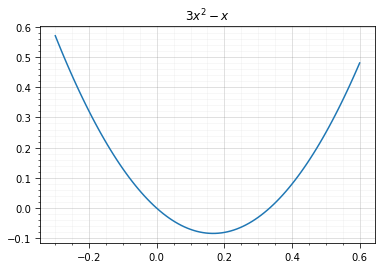

In [4]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

# ======================= Método Newton ======================= #

# Se expresa como variables simbólicas [Muy utilizado en matlab]
x = Symbol('x')
f_n = 3*x**2-x
diff_f = f_n.diff(x)

# Se pasa a un formato en donde se pueda operar x
f_n = lambdify(x, f_n)
diff_f = lambdify(x, diff_f)

# Gráfica
x = np.linspace(-0.3, 0.6, 100)
y = f_n(x)

plt.plot(x, y)
plt.title(r'$3x^2-x$')
plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.show()

La función $3x^2-x$ tienen dos raices, el método de Newton necesita un valor inicial por parámetro tanto en su implementación desde 0 como con la librería, note que en el siguiente código este puede dar una raíz o la otra dependiendo del $x_0$ que se utilice.

In [5]:
sol_2 = opt.root_scalar(f, x0 = 0.4, fprime = diff_f,  method='newton')
sol_2

      converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 0.5668366464036539

In [6]:
sol_2 = opt.root_scalar(f, x0 = 0.1, fprime = diff_f,  method='newton')
sol_2

      converged: True
           flag: 'converged'
 function_calls: 62
     iterations: 31
           root: -0.6609495080166972

In [7]:
# Utilizando el f del ejemplo de bisección 

x = Symbol('x')
f = sin(x-3)**2 - cos(2*x)
diff_f = f.diff(x)

# Se pasa a un formato en donde se pueda operar x
f = lambdify(x, f)
diff_f = lambdify(x, diff_f)

sol_2 = opt.root_scalar(f, x0 = 0.6, fprime = diff_f,  method='newton')

# Resultados
print("¿La solución convergió? {}".format(sol_2.converged))
print("Número de iteraciones: {}".format(sol_2.iterations))
print("Resultado raíz: {}".format(sol_2.root))

¿La solución convergió? True
Número de iteraciones: 4
Resultado raíz: 0.5668366475637197


Note que el método de Newton tiene un menor número de iteraciones, esto se debe a que la ecuación que se utiliza parte de las series de Taylor. Puede leer más de esto en el libro <font color="blue">Métodos Numéticos para ingenieros de Steven C. Chapla y Raymon P. Canale. </font> 

## Método de Secante
----

Parte del mismo principio del método de Newton pero en este no es necesario conocer la derivada, esta se aproxima por el método de diferencias finitas, quedando de la siguiente forma:

$$x_{x+1}=x_i-\frac{f(x_i)(x_i-x_{i-1})}{f(x_i)-f(x_{i-1})}$$

Para utilizarlo, se debe poder conocer su derivada y se recomienda graficarlo antes ya que no garantiza que se encuentre una raíz. Para su implementación se utilizará en el parámetro ``method = 'secant'``

In [8]:
tolerancia = 10**-8

sol_2 = opt.root_scalar(f, method='secant', x0 = 0, x1= 1, rtol= tolerancia)

# Resultados
print("¿La solución convergió? {}".format(sol_2.converged))
print("Número de iteraciones: {}".format(sol_2.iterations))
print("Resultado raíz: {}".format(sol_2.root))

¿La solución convergió? True
Número de iteraciones: 6
Resultado raíz: 0.5668366475637199


## Dos ecuaciones y dos variables
----

Se quiere resolver el siguiente sistema de ecuaciones que tiene dos variables, tome $x = x_0$ y $y = x_1$, esto por la notación de la función de la librería. 

$$ (x_0 + 3)\times (x_1^3 - 7) = -18 $$

$$ \sin{(x_1 e^{x_0} - 1)} = 0 $$

La lógica detrás de lo anterior consiste en encontrar el punto de intersección entre las dos ecuaciones, para esto se igualan las ecuaciones a 0, después de lo anterior se introducen en la función ``fsolve``.

Pasos:
1. Importar la librería: ``from scipy.optimize import fsolve``
2. Definir la función que se va a evaluar. <font color="red">¡OJO! se utiliza la notación de arriba x = x[0] y y = x[1]. </font> 
3. Llamar el método fsolve, entra por parámetro la función definida anteriormente y los valores iniciales x, y en el caso 2D como primeras aproximaciones.

Solución en x: 1.1335348765179664e-13
Solución en y: 0.9999999999991627


C:\Users\malej\AppData\Local\Temp\ipykernel_1276\459513798.py:14: RuntimeWarning: invalid value encountered in power
  y_1 = (-18/(x + 3) + 7)**(1 / 3)


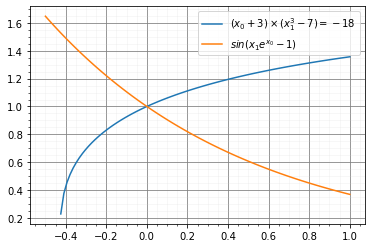

In [9]:
from scipy.optimize import fsolve

def func(x):
    return [(x[0] + 3) * (x[1]**3 - 7) + 18,
            math.sin(x[1] * math.exp(x[0])-1)]

root = fsolve(func, [-0.5, 0.5])

# Resultados
print("Solución en x: {}".format(root[0]))
print("Solución en y: {}".format(root[1]))

x = np.linspace(-0.5, 1, 100)
y_1 = (-18/(x + 3) + 7)**(1 / 3)
y_2 = 1 / np.exp(x)
plt.plot(x, y_1, label = r'$(x_0 + 3)\times (x_1^3 - 7) = -18$')
plt.plot(x, y_2, label = r'$sin{(x_1 e^{x_0} - 1)}$')
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(None, None)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.legend()
plt.show()

# Aparece un error es normal por los valores que está calculando 

# Parte práctica
----
En este caso, se va aplicar el método de solucion de ecuaciones no lineales en un problema de mecánica de fluidos. Cuando se estudian casos de flujo interno (por ejemplo, tuberías y sistemas de bombeo) es importante tener en cuenta los valores de las pérdidas debido a la fricción del fluido con las paredes. Esta información pasa a ser relevante en los casos de diseño de sistemas y selección de equipos de bombeo. Esta pérdida puede ser expresada en términos de una cabeza $h_f$, cuya dimensión son unidades de longitud, y puede interpretarse como una distancia máxima que se está perdiendo a causa de la fricción. Se define esta cabeza de pérdidas como:

$$ h_f = f \frac{l}{d} \frac{V^2}{2g} $$

Donde $f$ es el factor de fricción, una cantidad adimensional que es función de la rugosidad relativa y de las variables dinámicas del sistema. Las cantidades $l$ y $d$ son la longitud y el diámetro de la tubería, y $V$ es la velocidad del fluido. 

## Factor de fricción

El factor de fricción depende de la rugosidad relativa de la tubería y del número de Reynolds $Re$, esto se puede ver de mejor forma en el diagrama de Moody. A su vez, el número de Reynolds está definido como:

$$ Re = \frac{V D}{\nu} $$

Donde $V$ es la velocidad del flujo, $D$ el diámetro de la tubería y $\nu$ es la viscosidad cinemática del fluido. 

Este número adimensional permite clasificar los flujos de dos maneras, flujo turbulento y flujo laminar. El primero hace referencia a cuando el flujo es fluctuante y agitado, mientras que en el segundo el movimiento del fluido es suave y ordenado. 

* Laminar si $0 \leq Re \leq 10^3$
* Transición a la turbulencia si $10^3 \leq Re \leq 10^4$
* Turbulento si $10^4 \leq Re \leq \infty$

El factor de fricción para **flujos laminares** se puede aproximar con la siguiente expresión:

$$f_{lam} = \frac{64}{Re}$$

Para **flujos turbulentos** comunmente se utiliza el diagrama de Moody, pero no muchas veces se tiene este a la mano, por lo cual se utiliza la ecuación de Colebrook - White, este es un problema de raices ya que se tiene el término de la fricción en ambos lados de la ecuación, por lo cual se busca un $(f)$ tal que la solución del sistema sea 0. 

$$\frac{1}{\sqrt{f}} = -2 \log_{10}{\bigg( \frac{\epsilon/d}{3.7} + \frac{2.51}{Re \sqrt{f}}\bigg)}$$

Puede leer más de esto en el libro <font color="blue">Mecánica de Fluidos de Frank M. White </font> 

## Resultados a entregar

Realizar una gráfica que muestre cómo varía la cabeza de pérdidas para: (1) tubería **_lisa_**, (2) una de una rugosidad relativa de 0.01 y (3) otra 0.02, todas con 10m de longitud con diámetros entre 10 y 20 centímetros, para una bomba que entrega un caudal de agua de $0.02 m^3/s$. Utilizar el valor de viscosidad cinemática del agua a 20 °C: $1.0035\times 10 ^{-6} m^2/s$

Recordar que el caudal se define como:

$$ Q = VA$$

Donde $V$ es la velocidad del fluido y $A$ es el **área transversal** de la tubería. 

**Nota**: Se recomienda verificar si el flujo es laminar o turbulento con el fin de usar la ecuación correcta de resolución para el factor de fricción. 

Se puede verificar el valor del factor de fricción encontrado usando el Diagrama de Moody, una gráfica que relaciona el número de reynolds con la rugosidad relativa y el factor de fricción:

<img src="./img/Moody.png" width="600" height="700">

In [1]:
# Importar librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as opt
from sympy import *

In [2]:
# Funciones 

def reynolds(velocidad: np.array, diametro: float, viscosidad: float)-> np.array:
    """
    Función para el cálculo del número de Reynolds

    Parameters
    ----------
    velocidad : np.array
        Velocidad del fluido [m/s].
    diametro : float
        Diámetro de la tubería [m].
    viscosidad : float
        Viscosidad cinemática del fluido [m2/s].

    Returns
    -------
    np.array
        Número de Reynolds.

    """
    
    return velocidad*diametro / viscosidad 

def colebrook_white(x: float, rug_rel: float, Re: float)-> float:
    """
    Función de colebrook whites

    Parameters
    ----------
    x : float
        Factor de fricción.
    rug_rel : np.array
        Rugosidad relativa de la tubería.
    Re : float
        Número de Reynolds.

    Returns
    -------
    float
        resultado entre el .

    """
    return 1/np.sqrt(x) + 2*np.log10((rug_rel/3.7) + (2.51/(Re*np.sqrt(x))))

In [3]:
# Diámetros [m]
diametros = np.linspace(10, 20, 10)/100

# Gravedad [m/s^2]
g = 9.81 

# Rugosidades relativas
rug_re_0 = 0
rug_re_1 = 0.01 
rug_re_2 = 0.02

# Viscosidad [m^2/s]
vis = 1.0035e-6  

# Caudal [m^3/s]
Q = 0.02      

# Longitud [m]
L = 10 

# Áreas diámetros [m^2]
Areas = np.pi*(diametros/2)**2

# Velocidad del Fluido [m/s]
Velocidad = Q/Areas

# Número de Reynolds
Reynolds = reynolds(Velocidad, diametros, vis)

# Comprobación tipo de flujo
print(Reynolds<10**3) 

[False False False False False False False False False False]


In [5]:
# Implementación método de bisección

# Límites 
x_l = 0.001     # Inferior
x_u = 0.05      # Superior

fric_1 = []     # Factores fricción tubería lisa
fric_2 = []     # Factores fricción 0.01
fric_3 = []     # Factores fricción 0.02

for i in range(len(Reynolds)):
    # Rugosidad tubería lisa
    sol_1 = opt.root_scalar(f= colebrook_white, 
                          bracket=[x_l, x_u], 
                          method = 'bisect',
                          args = (rug_re_0, Reynolds[i]))

    # Rugosidad tubería 0.01
    sol_2 = opt.root_scalar(f= colebrook_white, 
                          bracket=[x_l, x_u], 
                          method = 'bisect',
                          args = (rug_re_1, Reynolds[i]))

    # Rugosidad tubería 0.02
    sol_3 = opt.root_scalar(f= colebrook_white, 
                          bracket=[x_l, x_u], 
                          method = 'bisect',
                          args = (rug_re_2, Reynolds[i]))
    
    fric_1.append(sol_1.root)
    fric_2.append(sol_2.root)
    fric_3.append(sol_3.root)

# DataFrame con los datos de los factores de fricción encontrados
df = pd.DataFrame({'Diametros': diametros,
                   'Lisa': fric_1,
                   '0.01': fric_2,
                   '0.02': fric_3})
df

,Diametros,Lisa,0.01,0.02
0,0.100000,0.014932,0.038143,0.048792
1,0.111111,0.015238,0.038169,0.048809
2,0.122222,0.015523,0.038195,0.048826
3,0.133333,0.015790,0.038222,0.048843
4,0.144444,0.016042,0.038248,0.048860
5,0.155556,0.016280,0.038274,0.048877
6,0.166667,0.016507,0.038300,0.048894
7,0.177778,0.016722,0.038326,0.048911
8,0.188889,0.016929,0.038352,0.048928
9,0.200000,0.017127,0.038378,0.048945


In [6]:
# Cabeza de pérdidas o perdidas por fricción en la longitud de la tubería
# Tubería Lisa
h_f_lisa = df['Lisa']*(L/diametros)*(Velocidad**2/(2*g))

# Tubería e = 0.01
h_f_1 = df['0.01']*(L/diametros)*(Velocidad**2/(2*g))

# Tubería e = 0.02
h_f_2 = df['0.02']*(L/diametros)*(Velocidad**2/(2*g))

# DataFrame con los datos de los factores de fricción encontrados
df_hf = pd.DataFrame({'Diametros': diametros,
                      'Lisa': h_f_lisa,
                      '0.01': h_f_1,
                      '0.02': h_f_2})
df_hf

,Diametros,Lisa,0.01,0.02
0,0.100000,0.493505,1.260649,1.612598
1,0.111111,0.297390,0.744915,0.952556
2,0.122222,0.188110,0.462852,0.591669
3,0.133333,0.123845,0.299777,0.383078
4,0.144444,0.084321,0.201041,0.256820
5,0.155556,0.059076,0.138886,0.177360
6,0.166667,0.042422,0.098433,0.125658
7,0.177778,0.031124,0.071333,0.091033
8,0.188889,0.023269,0.052716,0.067252
9,0.200000,0.017690,0.039639,0.050552


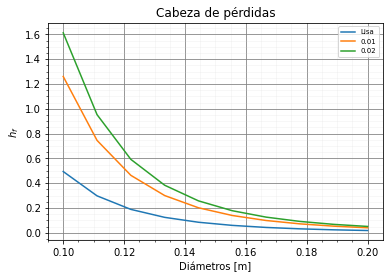

In [7]:
plt.plot(diametros, h_f_lisa, label = 'Lisa')
plt.plot(diametros, h_f_1, label = '0.01')
plt.plot(diametros, h_f_2, label = '0.02')
plt.legend(loc=1, fontsize= 7)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.title('Cabeza de pérdidas')
plt.xlabel('Diámetros [m]')
plt.ylabel(r'$h_f$')

plt.show()